In [1]:
adam_optimizer

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [5]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [14]:
class FashionClassifierWithDropout(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        self.input = nn.Linear(784,256)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        
        x = x.view(x.shape[0],-1)
        
        x = self.dropout(F.relu(self.input(x)))
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        
        x = F.log_softmax(self.fc3(x), dim=1)
        
        return x

In [26]:
model = FashionClassifierWithDropout()
loss_criteria = nn.NLLLoss()
adam_optimizer = optim.Adam(model.parameters(), lr = 0.01)


epochs = 30

testing_loss = []
training_loss = []

for e in range(epochs):
    cumulative_loss = 0
    
    for images, lables in trainloader:
        
        adam_optimizer.zero_grad()
        
        logPs = model(images)
        loss = loss_criteria(logPs, lables)
        loss.backward()
        adam_optimizer.step()
        
        cumulative_loss += loss.item()
        
    else:
        
        cum_test_loss = 0
        accuracy = 0
        
        model.eval()
        with torch.no_grad():
            for tst_imgs, tst_lbls in testloader:
                tst_log_ps = model(tst_imgs)
                cum_test_loss += loss_criteria(tst_log_ps, tst_lbls)
                
                               
                tst_ps = torch.exp(tst_log_ps)
                
                top_prob, top_class = tst_ps.topk(1, dim=1)
                
                tst_eq = top_class == tst_lbls.view(*top_class.shape)
                accuracy += torch.mean(tst_eq.type(torch.FloatTensor))
                
        training_loss.append(cumulative_loss/(len(trainloader)))
        testing_loss.append(cum_test_loss/(len(testloader)))
        
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(cumulative_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(cum_test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
            
        model.train()



Epoch: 1/30..  Training Loss: 0.804..  Test Loss: 0.589..  Test Accuracy: 0.783
Epoch: 2/30..  Training Loss: 0.725..  Test Loss: 0.598..  Test Accuracy: 0.782
Epoch: 3/30..  Training Loss: 0.693..  Test Loss: 0.570..  Test Accuracy: 0.800
Epoch: 4/30..  Training Loss: 0.711..  Test Loss: 0.527..  Test Accuracy: 0.818
Epoch: 5/30..  Training Loss: 0.692..  Test Loss: 0.637..  Test Accuracy: 0.780
Epoch: 6/30..  Training Loss: 0.742..  Test Loss: 0.545..  Test Accuracy: 0.813
Epoch: 7/30..  Training Loss: 0.707..  Test Loss: 0.560..  Test Accuracy: 0.810
Epoch: 8/30..  Training Loss: 0.679..  Test Loss: 0.548..  Test Accuracy: 0.814
Epoch: 9/30..  Training Loss: 0.707..  Test Loss: 0.569..  Test Accuracy: 0.811
Epoch: 10/30..  Training Loss: 0.708..  Test Loss: 0.586..  Test Accuracy: 0.794
Epoch: 11/30..  Training Loss: 0.725..  Test Loss: 0.543..  Test Accuracy: 0.810
Epoch: 12/30..  Training Loss: 0.713..  Test Loss: 0.521..  Test Accuracy: 0.828
Epoch: 13/30..  Training Loss: 0.739.

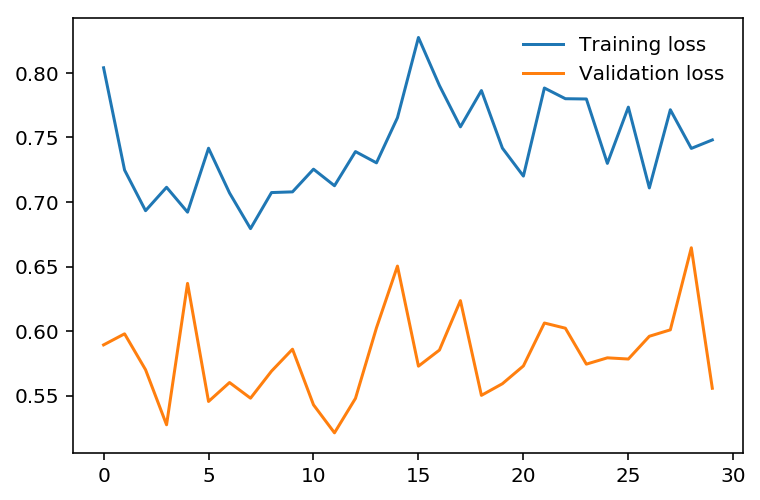

In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(training_loss, label='Training loss')
plt.plot(testing_loss, label='Validation loss')
plt.legend(frameon=False)


In [31]:
model

FashionClassifierWithDropout(
  (input): Linear(in_features=784, out_features=256, bias=True)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)